# DataScience Assessment for RandomWalk

# Necessary modules are imported first

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# load the csv file into dataframe

In [128]:
df=pd.read_csv("dataset.csv")

In [129]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [130]:
df.shape #this dataset has 344 rows, 7 cols

(344, 7)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)


In [132]:
df.isnull().sum()/df.shape[0]*100


species              0.000000
island               0.000000
bill_length_mm       2.034884
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  4.651163
dtype: float64

this gives us the percentage of missing values, in the respective columns

In [133]:
#to check for duplicates
df.duplicated().sum()

0

In [134]:
df_cleaned = df.dropna(thresh=3)
#cleared records with more than 3 values are NaN, are removed.

In [135]:
df_cleaned

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [136]:
df_cleaned.shape

(342, 7)

In [137]:
df.shape

(344, 7)

In [138]:
df_cleaned.isnull().sum()

species               0
island                0
bill_length_mm        5
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  14
dtype: int64

## now there is bill_length_mm 5 entries with NaN, fill in with mean data of the records, to get more closer value , mean value of the particular species, island is used.

In [139]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [140]:
grouped = df_cleaned.groupby(['species', 'island'])
mean_values = grouped['bill_length_mm'].transform('mean')

In [141]:
mean_values

0      38.950980
1      38.950980
2      38.950980
4      38.950980
5      38.950980
         ...    
339    48.874627
340    48.874627
341    48.874627
342    48.874627
343    48.874627
Name: bill_length_mm, Length: 342, dtype: float64

In [142]:
df_cleaned.loc[:, 'bill_length_mm'] = df_cleaned['bill_length_mm'].fillna(mean_values)

In [143]:
df_cleaned.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [144]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [145]:
sex_grouped = grouped['sex']

In [146]:
df_cleaned.loc[:, 'sex'] = sex_grouped.transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown'))

In [147]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


# now all the blank places are filled

In [148]:
columns_to_check = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
negative_values = df_cleaned[columns_to_check] < 0
negative_rows = df_cleaned[negative_values.any(axis=1)]
print(negative_rows)

Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


#there are no, negative values in the dataset, hence there are no incorrect values

# Q2: What is the average body_mass_g for Gentoo penguins? 

In [149]:
average_body_mass_g = df_cleaned[df_cleaned['species'] == 'Gentoo']['body_mass_g'].mean()
print("Average body mass for Gentoo penguins:", average_body_mass_g)

Average body mass for Gentoo penguins: 5133.739837398374


# Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. 

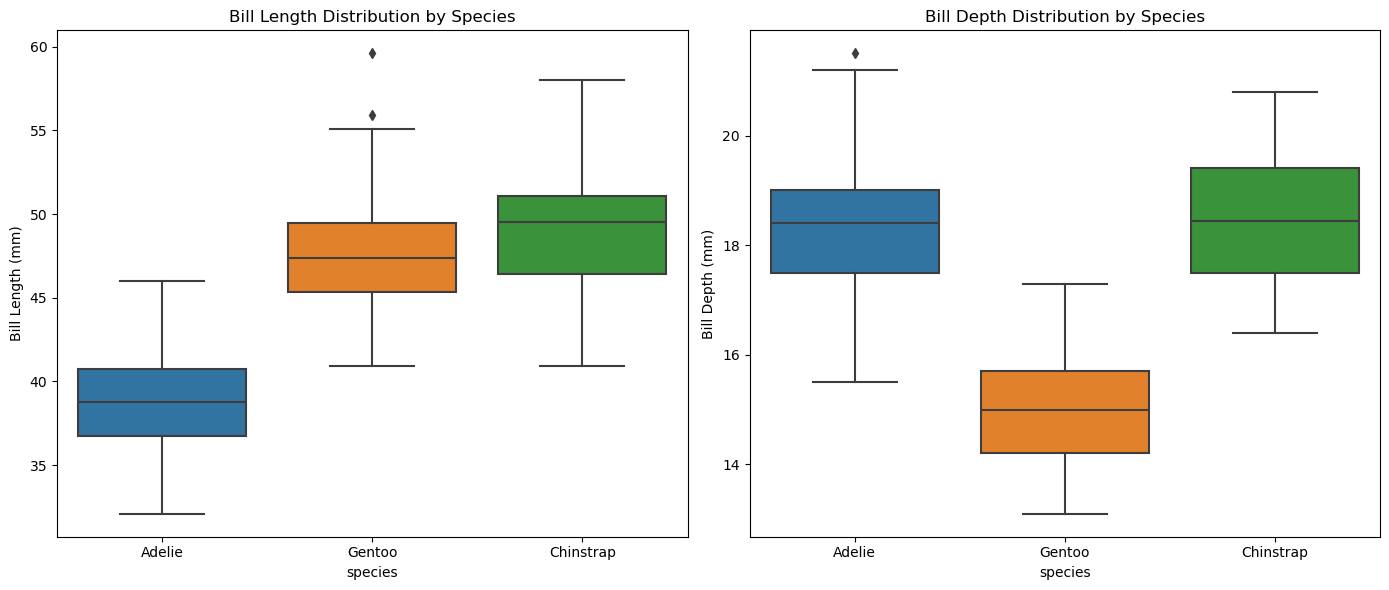

     species         level_1  Skewness  Kurtosis
0     Adelie  bill_length_mm  0.161674 -0.157204
1     Adelie   bill_depth_mm  0.321239 -0.060308
2  Chinstrap  bill_length_mm -0.121367  0.099184
3  Chinstrap   bill_depth_mm  0.006879 -0.874796
4     Gentoo  bill_length_mm  0.695696  1.479732
5     Gentoo   bill_depth_mm  0.324231 -0.583455


In [150]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='species', y='bill_length_mm', data=df_cleaned)
plt.title('Bill Length Distribution by Species')
plt.ylabel('Bill Length (mm)')
plt.subplot(1, 2, 2)
sns.boxplot(x='species', y='bill_depth_mm', data=df_cleaned)
plt.title('Bill Depth Distribution by Species')
plt.ylabel('Bill Depth (mm)')

plt.tight_layout()
plt.show()
skewness = df_cleaned.groupby('species')[['bill_length_mm', 'bill_depth_mm']].agg(pd.Series.skew)
kurtosis = df_cleaned.groupby('species')[['bill_length_mm', 'bill_depth_mm']].agg(pd.Series.kurt)


distribution_stats = pd.DataFrame({
    'Skewness': skewness.stack(),
    'Kurtosis': kurtosis.stack()
}).reset_index()

print(distribution_stats)

# Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)

## method used here is Z score, it gives us the measures how many standard deviations a data point is from the mean. Outliers usually have a Z-score greater than 3 or less than -3.


In [151]:
df_numeric = df_cleaned.select_dtypes(include=[np.number])
z_score=np.abs((df_numeric-df_numeric.mean())/df_numeric.std())
outliers=z_score>3
outlier_columns = outliers.any()

print("Columns with outliers:", df_numeric.columns[outlier_columns])

Columns with outliers: Index(['body_mass_g'], dtype='object')


<Axes: xlabel='species', ylabel='body_mass_g'>

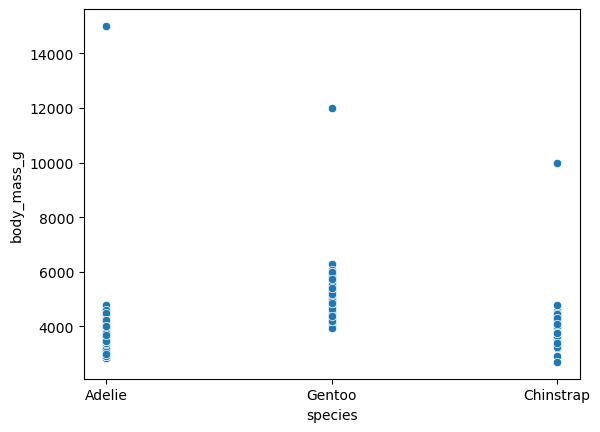

In [152]:

#visualizing the col with outliers, and clearly we can see distinctive outliers in that column
sns.scatterplot(x="species",y="body_mass_g",data=df_cleaned)

# Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)



In [170]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

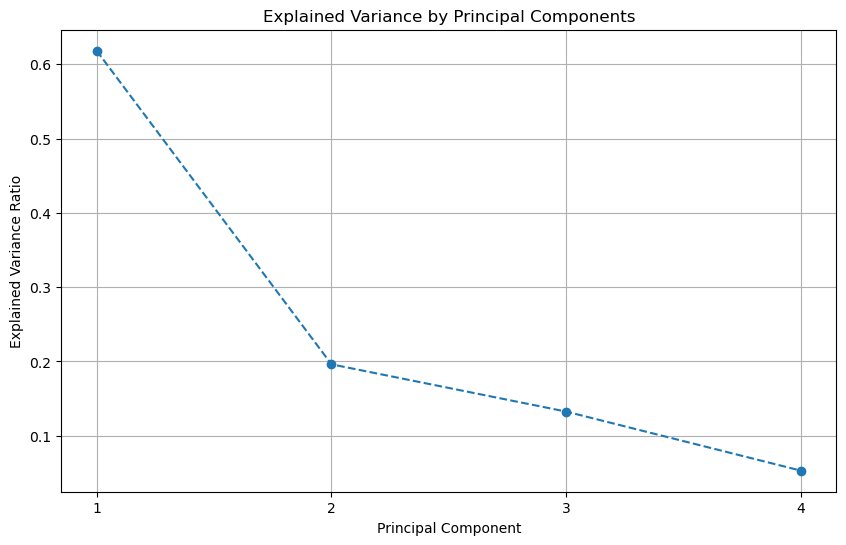

        PC1       PC2       PC3       PC4
0 -1.824806  0.131762  0.390851  0.367233
1 -1.280727 -0.374763  0.263473  0.368401
2 -1.203135 -0.195316 -0.253697 -0.310918
3 -1.795294  0.050548  0.363870 -0.672331
4 -1.878939  0.890481  0.339805 -0.508787


In [171]:
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned[numerical_cols])

pca = PCA()
pca.fit(df_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

pca_components = pca.transform(df_scaled)
pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i+1}' for i in range(len(numerical_cols))])

print(pca_df.head())

# Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

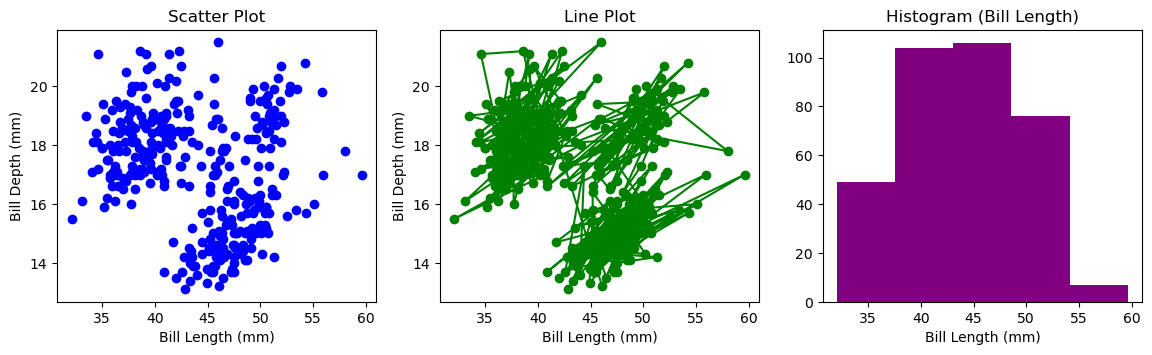

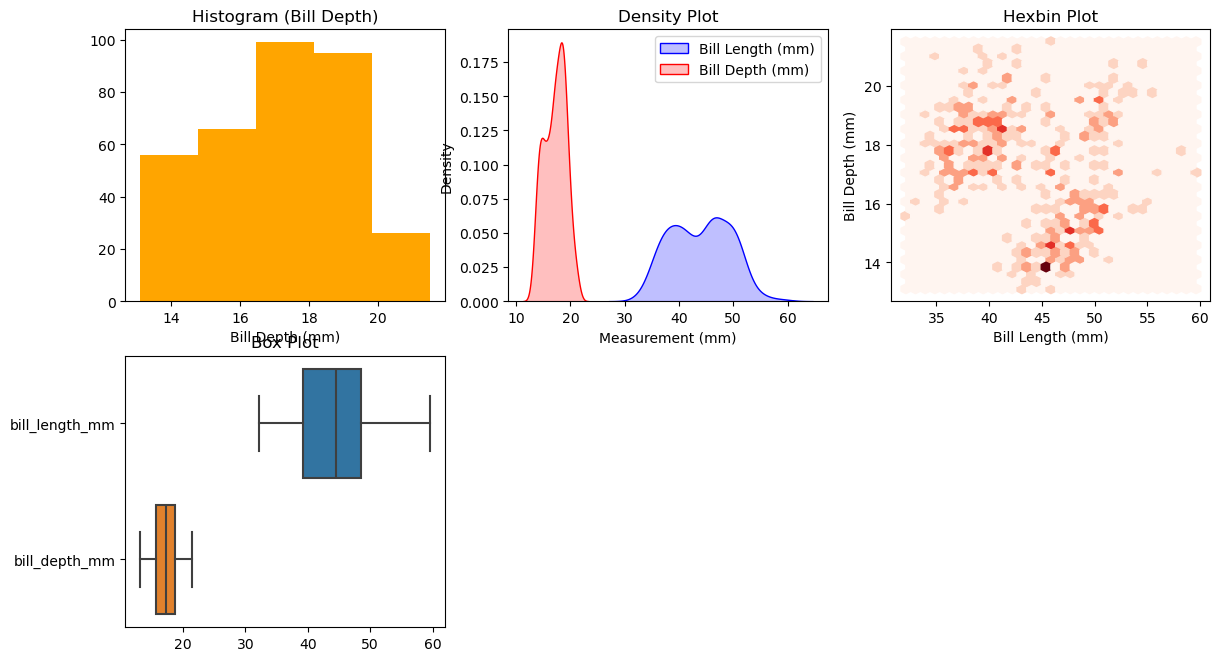

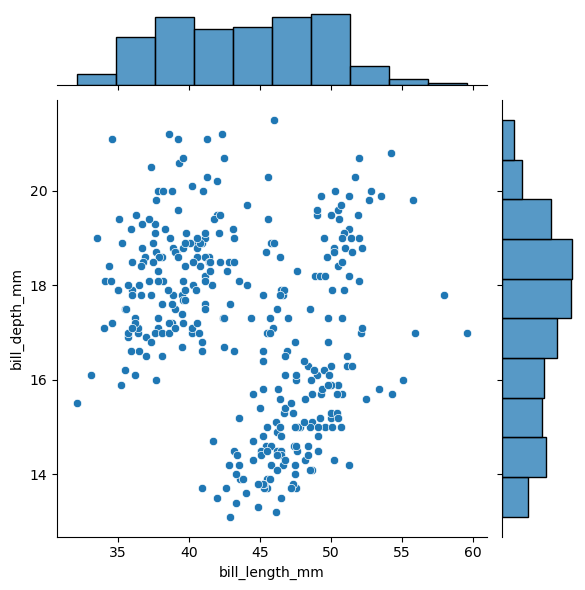

In [178]:
plt.figure(figsize=(14, 12))

# 1. Scatter Plot
plt.subplot(3, 3, 1)
plt.scatter(df_cleaned['bill_length_mm'], df_cleaned['bill_depth_mm'], color='b')
plt.title('Scatter Plot')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

# 2. Line Plot
plt.subplot(3, 3, 2)
plt.plot(df_cleaned['bill_length_mm'], df_cleaned['bill_depth_mm'], marker='o', color='g')
plt.title('Line Plot')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

# 3. Histogram (for bill_length_mm)
plt.subplot(3, 3, 3)
plt.hist(df_cleaned['bill_length_mm'], bins=5, color='purple')
plt.title('Histogram (Bill Length)')
plt.xlabel('Bill Length (mm)')

plt.figure(figsize=(14, 12))

# 4. Histogram (for bill_depth_mm)
plt.subplot(3, 3, 4)
plt.hist(df_cleaned['bill_depth_mm'], bins=5, color='orange')
plt.title('Histogram (Bill Depth)')
plt.xlabel('Bill Depth (mm)')

# 6. Density Plot
plt.subplot(3, 3, 5)
sns.kdeplot(df_cleaned['bill_length_mm'], color='blue', label='Bill Length (mm)', fill=True)
sns.kdeplot(df_cleaned['bill_depth_mm'], color='red', label='Bill Depth (mm)', fill=True)
plt.title('Density Plot')
plt.xlabel('Measurement (mm)')
plt.legend()

# 7. Hexbin Plot
plt.subplot(3, 3, 6)
plt.hexbin(df_cleaned['bill_length_mm'], df_cleaned['bill_depth_mm'], gridsize=30, cmap='Reds')
plt.title('Hexbin Plot')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

# 5. Box Plot
plt.subplot(3, 3, 7)
sns.boxplot(data=df_cleaned[['bill_length_mm', 'bill_depth_mm']], orient='h')
plt.title('Box Plot')

sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df_cleaned, kind='scatter', marginal_kws=dict(bins=10, fill=True))


plt.show()

# Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)



In [157]:
max_flipper_len=grouped['flipper_length_mm'].max().reset_index()
max_flipper_len.columns = ['species', 'island', 'max_flipper_length']
print(max_flipper_len)

     species     island  max_flipper_length
0     Adelie     Biscoe               203.0
1     Adelie      Dream               208.0
2     Adelie  Torgersen               210.0
3  Chinstrap      Dream               212.0
4     Gentoo     Biscoe               231.0


In [158]:
longest_flippers = max_flipper_len.loc[max_flipper_len.groupby('island')['max_flipper_length'].idxmax()]
print(longest_flippers)

     species     island  max_flipper_length
4     Gentoo     Biscoe               231.0
3  Chinstrap      Dream               212.0
2     Adelie  Torgersen               210.0


# Q8: Perform z-score normalization on this dataset. (code)

In [173]:
df_normalized = df_cleaned.copy() 
df_normalized[numerical_cols] = stats.zscore(df_normalized[numerical_cols])
print(df_normalized.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.886819       0.785449          -1.418347   
1  Adelie  Torgersen       -0.813438       0.126188          -1.062250   
2  Adelie  Torgersen       -0.666675       0.430462          -0.421277   
4  Adelie  Torgersen       -1.327108       1.089724          -0.563715   
5  Adelie  Torgersen       -0.850129       1.748985          -0.777373   

   body_mass_g     sex  
0    -0.468844    male  
1    -0.424105  female  
2    -0.916235  female  
4    -0.737278  female  
5    -0.558322    male  
